In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [156]:
pred={}
perf={}
pred[0]=pd.read_csv('stock_TSSOS_d1.csv',header=0)['pred']
perf[0]=pd.read_csv('stock_TSSOS_d1.csv',header=0)['rmse']
for i in range(1,5):
    pred[i]=pd.read_csv('stock_MATLAB_d'+str(i)+'.csv',header=None)[0]
    perf[i]=pd.read_csv('stock_MATLAB_d'+str(i)+'.csv',header=None)[1]

In [220]:
c=('#EEB422','#2171b5', '#4292c6', '#6baed6', '#9ecae1')
name=['tssos md=1']+['ssest    d='+str(i) for i in range(1,5)]

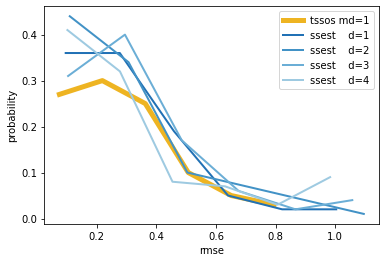

In [233]:
for i in range(5):    
    # Histogram
    heights,bins = np.histogram(perf[i].tolist(),bins=6)

    # Normalize
    heights = heights/float(sum(heights))
    binMids=bins[:-1]+np.diff(bins)/2.
    plt.plot(binMids,heights,color=c[i],label=name[i], linewidth=[2 if i>0 else 5][0])

plt.xlabel('rmse')
plt.ylabel('probability')
plt.legend()

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig('stock_pdf.pdf')

In [170]:
# read original time series
with open('stock-market.txt') as f:
    ts = [float(x.rstrip("\n")) for x in f.readlines()]

In [202]:
def nrmse(y,f):
    return (1-sum((y[i]-f[i])**2 for i in range(len(y)))/ sum((y[i]-np.mean(y))**2 for i in range(len(y))))*100

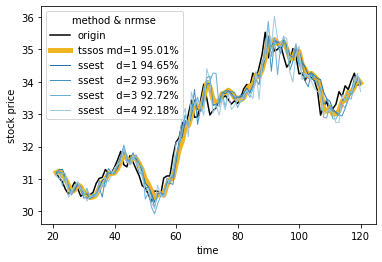

In [235]:
time=[*range(21,121)]
plt.plot(time,ts[20:120],'black',label='origin')
for i in range(5):
    label=name[i]+' '+str(round(nrmse(ts[20:120],pred[i]),2))+'%'
    plt.plot(time,pred[i],color=c[i],label=label,linewidth=[1 if i>0 else 5][0])

plt.xlabel('time')
plt.ylabel('stock price')
plt.legend(title='method & nrmse')

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig('stock_ts100.pdf')